# Progress report

In [ ]:
import pandas as pd

## 1. Project introduction: 
an introduction that discusses the data you are analyzing, and the question or questions you are investigating.

## 2. Any changes
 a discussion whether your scope has changed since the check-in proposal slides. What did you aim to do that you will not do and what have you added to the project?

## 3. Data cleaning: 
show clearly how you cleaned your data. 

## 4. Exploratory data analysis: 
explain what your data looks like (words are fine, but visualizations are often better). Include any interesting issues or preliminary conclusions you have about your data. 

## 5. At least one visualization 
that tests an interesting hypothesis, along with an explanation about why you thought this was an interesting hypothesis to investigate.  

## 6. ML analysis


### Random Forest Regression Model

We initially chose to use a random forest regression model (RFR) to predict the number of COVID-19-related deaths per 1000 people within each zipcode as a function of the sociodemographic variables we gathered. As a baseline model, we simply predicted that the number of deaths per 1000 people would be equal to the median for all zipcodes, regardless of other input data. This resulted in an average absolute error rate of 1.02 deaths/1000. 

Prior to model generation, the data was split into training and testing subsets at a ratio of 7:3 (i.e. 70% training data). We used all variables that were individually correlated with deaths/1000 with correlation coefficients > 0.5 as input. Although we attempted to form an RFR with all of the available variables, this did not result in improved predictions.

In order to optimize hyperparameters for the RFR, we used a randomized search strategy across a grid of possible hyperparameter values with repeated K-fold cross validation, using 5 repeats of 2 splits for each randomly-selected combination of hyperparameter values. 

Our RFR with optimized hyperparameters predicted training data with an average absolute error rate of 0.62 deaths/1000, about 60% of the baseline error rate. 

In [29]:
from random_forest import *
from optimize_rfr_hyperparams import *

data = pd.read_csv('Chicago-Covid-SocioDemographics-Cases-Deaths.csv')

features, labels = filter_by_cor(data, "Death Counts(Per 1000)", 0.5)
X_train, X_test, y_train, y_test = split(features, labels)

In [ ]:
hyperparam_tuning = optimize_rf(X_train, y_train, random_grid = random_grid)
rf_model = rfr_custom(X_train, y_train, hyperparam_tuning.best_params_)

In [19]:
median_deaths = np.median(y_train)
baseline_pred = np.repeat(median_deaths, len(y_test))
errors = abs(rf_model.predict(X_test) - y_test)
print("Average absolute baseline error = ", round(np.mean(abs(baseline_pred - y_test)), 2), "(deaths per 1000)")
print("Average absolute model error = ", round(np.mean(errors), 2), "(deaths per 1000)")


Average absolute baseline error =  1.02 (deaths per 1000)
Average absolute model error =  0.62 (deaths per 1000)


### Principal Components Analysis

We also performed principal components analysis (PCA), in order to help visualize the distribution of COVID-19-related death rates in the multivariate sociodemographic dataspace. (Note: as an unsupervised learning technique, there is no baseline to compare the PCA to. That is why a baseline comparison is not discussed here.) 

The variables used for the PCA were the same as the input variables for the RFR above. In order to maintain separation of training and testing partitions formed above, only the training data was used for this analysis. The first two principal components, which together account for 77.47% of total variance between zipcodes, are visualized below. Each point on the plot represents one zipcode, and points are colored by the number of COVID-19-related deaths per 1,000 peope in that zipcode. 

Although there is no obvious clustering of the data, a rough pattern is apparent, wherein the highest death rates are located at low positions on both principal component axes, especially PC 1. This suggests that a pattern related sociodemographic variables to COVID-19-related deaths does exist, and a good model should be able to capture that pattern. However, there is still a substantial amount of noise present in the data. 

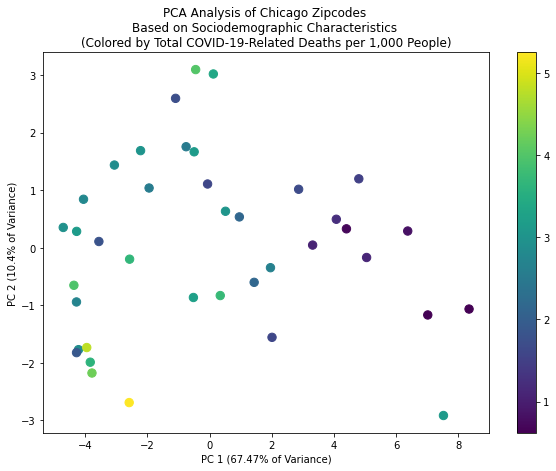

In [36]:
from PCA_analysis import *
data = pd.read_csv('Chicago-Covid-SocioDemographics-Cases-Deaths.csv')
scaled = scale_df(X_train)
pca2, xpca2 = PCA_2(scaled)
pca2.explained_variance_ratio_
plot_pca(xpca2, pca2, y_train, "PCA Analysis of Chicago Zipcodes \nBased on Sociodemographic Characteristics \n(Colored by Total COVID-19-Related Deaths per 1,000 People)", "viridis")

## 7. Reflection: 
a discussion of the following: 
    o What is hardest part of the project that you’ve encountered so far? 
    o What are your initial insights? 
    o Are there any concrete results you can show at this point? If not, why not? 
    o Going forward, what are the current biggest problems you’re facing? 
    o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to? 
    o Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results? 

## 8. Next steps: 
What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it. 